# Unit 4 - Noisy data
---
1. [Matplotlib - histograms](#section1)
2. [Standard deviation](#section2)
3. [Matplotlib - barcharts](#section3)


In [1]:
import pandas as pd
import numpy as np

<a id='section1'></a>

### 1. Histograms

#### Gym example

Taken from: https://data36.com/plot-histogram-python-pandas/

In [2]:
mu = 168 #mean
sigma = 5 #stddev
sample = 250
np.random.seed(0)
height_f = np.random.normal(mu, sigma, sample).astype(int)

In [3]:
mu = 176 #mean
sigma = 6 #stddev
sample = 250
np.random.seed(1)
height_m = np.random.normal(mu, sigma, sample).astype(int)

In [4]:
gym = pd.DataFrame({'height_f': height_f, 'height_m': height_m})
gym.head(7)

,height_f,height_m
0,176,185
1,170,172
2,172,172
3,179,169
4,177,181
5,163,162
6,172,186


To begin with - why a histogram?

This is what happens if we just plot lines:

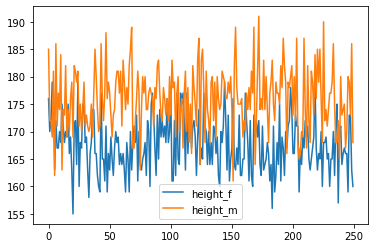

In [5]:
gym.plot()

Ummm.. it's very messy. 

#### Different histograms:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182BC911100>]],
      dtype=object)

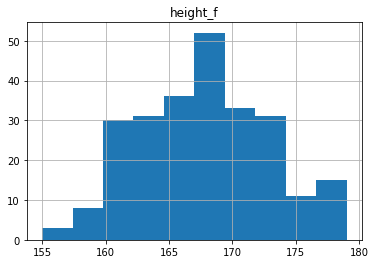

In [6]:
gym.hist('height_f')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182BDDF4E50>,
      dtype=object)

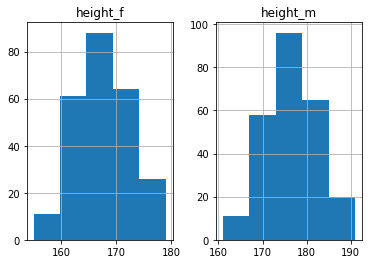

In [7]:
gym.hist(bins=5)

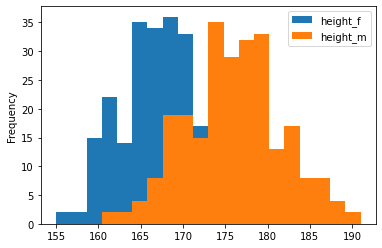

In [8]:
gym.plot.hist(bins=20)

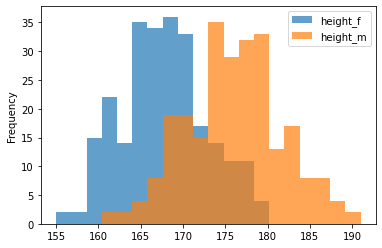

In [9]:
gym.plot.hist(bins=20, alpha=0.7)

Note: this is not a histogram. This is a barplot:

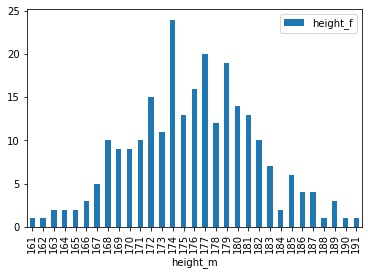

In [10]:
gym.groupby('height_m').count().plot.bar()

---
#### Back to our vaccinations data:

In [11]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 
vacc_df.head(2)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


#### Look at data for different countries
#### Use `groupby()` to group accoding to location

Group according to something + some columns + some summary statistic

Attempt #1 - what is wrong?

In [12]:
vacc_df.groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Afghanistan,120000.0,3000.0,NaN,NaN
Africa,13234659.0,315652.0,4499372.0,0.34
Albania,256810.0,17346.0,655.0,0.02
Algeria,75000.0,3748.0,NaN,NaN
Andorra,12440.0,679.0,1265.0,1.64
...,...,...,...,...
Venezuela,98000.0,11968.0,NaN,NaN
Vietnam,58037.0,3709.0,NaN,NaN
Wales,2065794.0,33151.0,509478.0,16.16


Attempt #2 - is this better?

In [13]:
vacc_df.fillna('0').groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Afghanistan,NaN,NaN,0,0
Africa,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,0,0
Andorra,NaN,NaN,NaN,NaN
...,...,...,...,...
Venezuela,NaN,NaN,0,0
Vietnam,58037.0,NaN,0,0
Wales,NaN,NaN,NaN,NaN


Attempt #3 - change the 0 from string to int, and finally, it works :-)

In [14]:
vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Afghanistan,120000.0,3000.0,0.0,0.00
Africa,13234659.0,315652.0,4499372.0,0.34
Albania,256810.0,17346.0,655.0,0.02
Algeria,75000.0,3748.0,0.0,0.00
Andorra,12440.0,679.0,1265.0,1.64
...,...,...,...,...
Venezuela,98000.0,11968.0,0.0,0.00
Vietnam,58037.0,3709.0,0.0,0.00
Wales,2065794.0,33151.0,509478.0,16.16


#### The `world` row shouldn't be there. Remove it using `.drop()` and `.index() :

In [15]:
vacc_df.drop(vacc_df.loc[vacc_df.location == 'World'].index, inplace = True)

---
#### Your turn:
>What do you think `.index` does? Why is it there? How can you find out?
---

Before we continue, just assign this long row to a new dataframe, will be easier

In [16]:
grouped_df = vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max().copy()
grouped_df.tail()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Uzbekistan,35000.0,5833.0,0.0,0.00
Venezuela,98000.0,11968.0,0.0,0.00
Vietnam,58037.0,3709.0,0.0,0.00
Wales,2065794.0,33151.0,509478.0,16.16
Zimbabwe,222733.0,12831.0,28797.0,0.19


#### sort the values using 'sort_values()`

In [17]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred', ascending = False).head(10)

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Gibraltar,63671.0,1068.0,29692.0,88.13
Israel,10231864.0,184871.0,4921648.0,56.86
Falkland Islands,4322.0,189.0,1717.0,49.30
Seychelles,103968.0,2401.0,39460.0,40.13
Cayman Islands,56214.0,1024.0,24553.0,37.36
Bermuda,41152.0,773.0,17361.0,27.88
Chile,11997908.0,298266.0,4643082.0,24.29
Jersey,67760.0,1233.0,22779.0,22.54
Monaco,20510.0,294.0,8795.0,22.41


#### Histogram according to all values:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182BDD9EE20>,
      dtype=object)

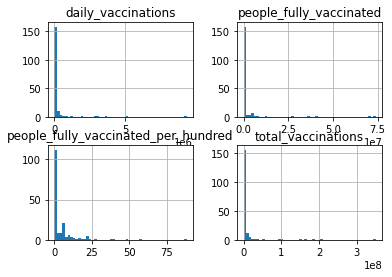

In [18]:
grouped_df.hist(bins=50)

#### Histogram according to people_fully_vaccinated_per_hundred

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182BF3CBD60>]],
      dtype=object)

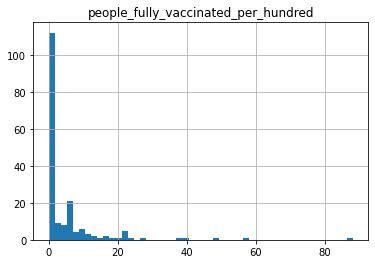

In [19]:
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

#### Remove rows with 0's

Note that this is different than changing values to 0's

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182BF321CA0>]],
      dtype=object)

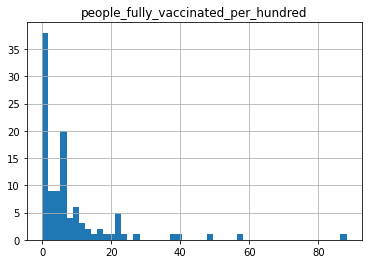

In [20]:
grouped_df.drop(grouped_df[grouped_df.people_fully_vaccinated_per_hundred == 0.0].index, inplace=True)
#grouped_df
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

---
>#### Your turn:
>
>Do the same, but for another column
---


---
>### Functions covered in this unit:
>
> `std()` - standard deviation
>
> `.hist(data, num_bins)` - the data and the number of bins 
>
> `.plot()` - simple line plot
>
> `.hist(data, num_bins, alpha)` - the data, the number of bins and the transparency (default is 10 bins, all data and not transparent)
>
> `.plot.hist()` - histograms on same chart
>
> `.groupby()` - group according to the columns specified
>
> `.drop()` - removes unwanted rows or columns
>
> `.index()` - index of the selected rows
>
> `sort_values()` - self explantory.. it just sorts values
>
---

### 2. Standard deviation

An small example showing that the more the data is spread, the higher the std:

In [21]:
df = pd.DataFrame({'height' : [161, 156, 172], 
                   'weight': [67, 65, 89],
                   'age': [20,20,20]})
df

,height,weight,age
0,161,67,20
1,156,65,20
2,172,89,20


In [22]:
df.mean()

height    163.000000
weight     73.666667
age        20.000000
dtype: float64

In [23]:
df.std()

height     8.185353
weight    13.316656
age        0.000000
dtype: float64

<a id='section2'></a>

### 3. Boxplots

In [24]:
np.random.seed(2345)
df = pd.DataFrame(np.random.randn(20,4),
                  columns=['C1', 'C2', 'C3', 'C4'])
df.head()

,C1,C2,C3,C4
0,-0.951299,1.768772,-1.141827,0.710755
1,0.510951,1.149029,-0.538460,-0.736645
2,-0.075996,0.848818,0.649783,-0.571212
3,-0.914158,-0.123520,0.281634,0.795612
4,0.179394,1.202007,0.371815,-0.290084


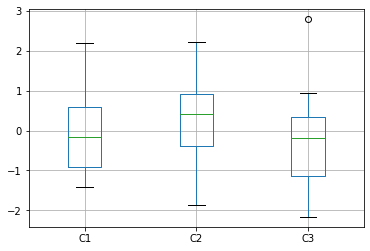

In [25]:
boxplot = df.boxplot(column=['C1', 'C2', 'C3'])

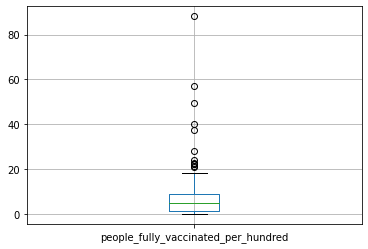

In [26]:
grouped_df.boxplot('people_fully_vaccinated_per_hundred')

In [27]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred')


,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Guatemala,137716.0,5748.0,1639.0,0.01
Albania,256810.0,17346.0,655.0,0.02
Tunisia,130374.0,8515.0,4979.0,0.04
Paraguay,48684.0,3830.0,2684.0,0.04
Philippines,922898.0,53533.0,50685.0,0.05
...,...,...,...,...
Cayman Islands,56214.0,1024.0,24553.0,37.36
Seychelles,103968.0,2401.0,39460.0,40.13
Falkland Islands,4322.0,189.0,1717.0,49.30


This doesn't seem to fit
https://ourworldindata.org/grapher/covid-vaccination-doses-per-capita

Is this an error???